In [22]:
import torch
import torch.nn as nn

import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import torchmetrics as tm
import random
import os
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [2]:
def seed_everything(seed=42):
    """"
    Seed everything.
    """   
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    np.random.seed(seed)

In [3]:
seed_everything()

In [4]:
train_dataset = torchvision.datasets.MNIST(root="./data",train=True,download=True,transform=transforms.ToTensor())
test_dataset = torchvision.datasets.MNIST(root="./data",train=False,transform=transforms.ToTensor())

In [5]:
train_fold , val_fold = torch.utils.data.random_split(train_dataset,[50000,10000])

In [6]:
train_loader = torch.utils.data.DataLoader(dataset = train_dataset, shuffle = True,batch_size = 128)
test_loader = torch.utils.data.DataLoader(dataset = test_dataset, shuffle = True,batch_size = 128)
train_fold_loader = torch.utils.data.DataLoader(dataset = train_fold, shuffle = True,batch_size = 128)
val_fold_loader = torch.utils.data.DataLoader(dataset = val_fold, shuffle = True,batch_size = 128)

In [7]:
print(train_loader)

In [8]:
dataiter = iter(train_loader)
data = next(dataiter)

In [9]:
data

[tensor([[[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ...,
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.]]],
 
 
         ...,
 
 
         [[[0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           [0., 0., 0.,  ..., 0., 0., 0.],
           ..

In [10]:
imgs , label = data

In [11]:
label

tensor([6, 6, 1, 5, 9, 8, 7, 8, 5, 1, 2, 8, 6, 7, 1, 9, 4, 2, 8, 3, 1, 9, 9, 8,
        5, 1, 7, 9, 7, 7, 2, 8, 6, 2, 8, 6, 0, 8, 3, 0, 5, 9, 7, 2, 4, 8, 3, 6,
        6, 7, 4, 2, 4, 8, 8, 0, 7, 3, 0, 5, 9, 5, 2, 6, 9, 2, 1, 0, 6, 3, 1, 9,
        3, 4, 7, 3, 9, 6, 1, 6, 9, 5, 2, 9, 9, 4, 0, 8, 9, 7, 2, 9, 7, 8, 2, 4,
        7, 4, 5, 9, 3, 4, 3, 3, 8, 9, 4, 1, 2, 0, 2, 0, 7, 3, 1, 8, 2, 5, 3, 1,
        2, 5, 1, 0, 5, 4, 1, 7])

In [12]:
imgs.shape

torch.Size([128, 1, 28, 28])

In [23]:
imgsF = torch.flatten(imgs,start_dim=1)
imgsF.shape

torch.Size([128, 784])

In [26]:
imgsF.size(1)

784

In [13]:
imgs[1][0]

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.1765, 0.3569, 0.3569, 0.2627, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

In [14]:
imgs[0][0][27][27]

tensor(0.)

In [15]:
len(label.unique())

10

6
6
1
5
9
8
7
8
5
1


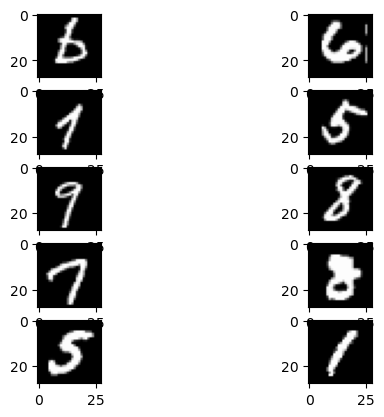

In [16]:
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(imgs[i][0],cmap="gray")
    print(label[i].item())
plt.show()

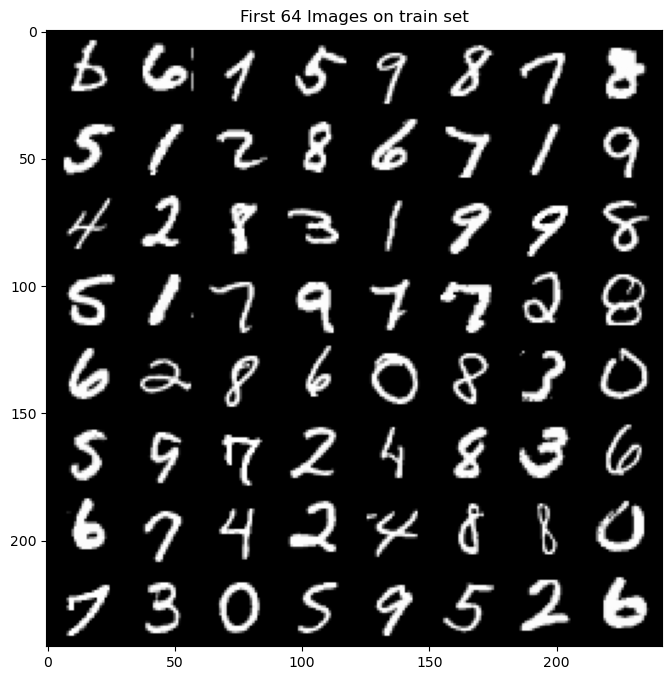

In [21]:
plt.figure(figsize=(8,8))

plt.title("First 64 Images on train set")

plt.imshow(np.transpose(torchvision.utils.make_grid(imgs[:64],padding=2,normalize=True),(1,2,0)))

plt.show()

GAN Model

In [31]:
class GAN(nn.Module):
    def __init__(self, color_dim, image_height, image_width, noise_dim) -> None:
        super().__init__()

        self.color_dim = color_dim
        self.image_height = image_height
        self.image_width = image_width
        self.noise_dim = noise_dim

        self.generator = nn.Sequential(
            nn.Linear(self.noise_dim,128),
            nn.ReLU(),
            nn.Linear(128,(color_dim*image_height*image_width)),
            nn.Sigmoid()
        )    

        self.discriminator = nn.Sequential(
            nn.Linear((color_dim*image_height*image_width),128),
            nn.ReLU(),
            nn.Linear(128,64),
            nn.ReLU(),
            nn.Linear(64,1),
            nn.LogSoftmax()
        )

    def generator_forward(self,noise):
        noise = torch.flatten(noise,start_dim=1)

        img = self.generator(noise)

        img = img.view (noise.size(0),self.color_dim,self.image_height,self.image_width)

        return img
    
    def discriminator_forward(self,img):

        img = torch.flatten(img,start_dim=1)

        decision = self.generator_forward(img)

        return decision



In [32]:
gan = GAN(1,28,28,100)

Hyper parameters


In [41]:
generator_lr = 0.001

discriminator_lr = 0.001

batch_size = 64

no_epochs = 100

noise_dim = 100

Loss Functions and Optimizers

In [40]:
generator_optimizer = torch.optim.Adam(gan.generator.parameters(),lr = generator_lr)
discriminator_optimizer = torch.optim.Adam(gan.discriminator.parameters(),lr = discriminator_lr)

criterion = nn.functional.binary_cross_entropy_with_logits

Training

In [42]:
#Preparing Fixed Noise Matrix to see generated images during training

fixed_noise = torch.randn(batch_size,noise_dim)

TypeError: randn() received an invalid combination of arguments - got (), but expected one of:
 * (tuple of ints size, *, torch.Generator generator, tuple of names names, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, torch.Generator generator, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, Tensor out, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
 * (tuple of ints size, *, tuple of names names, torch.dtype dtype, torch.layout layout, torch.device device, bool pin_memory, bool requires_grad)
